In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import imblearn
import keras

In [ ]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23391 entries, 0 to 23390
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  23391 non-null  float64
 1   HighBP                23391 non-null  float64
 2   HighChol              23391 non-null  float64
 3   CholCheck             23391 non-null  float64
 4   BMI                   23391 non-null  float64
 5   Smoker                23391 non-null  float64
 6   Stroke                23391 non-null  float64
 7   Diabetes              23391 non-null  float64
 8   PhysActivity          23391 non-null  float64
 9   Fruits                23390 non-null  float64
 10  Veggies               23390 non-null  float64
 11  HvyAlcoholConsump     23390 non-null  float64
 12  AnyHealthcare         23390 non-null  float64
 13  NoDocbcCost           23390 non-null  float64
 14  GenHlth               23390 non-null  float64
 15  MentHlth           

In [ ]:
for elm in df:
    print(df[elm].value_counts())

0.0    21244
1.0     2147
Name: HeartDiseaseorAttack, dtype: int64
0.0    13446
1.0     9945
Name: HighBP, dtype: int64
0.0    13553
1.0     9838
Name: HighChol, dtype: int64
1.0    22502
0.0      889
Name: CholCheck, dtype: int64
27.0    2244
24.0    1884
26.0    1884
25.0    1572
28.0    1527
        ... 
65.0       1
70.0       1
82.0       1
79.0       1
92.0       1
Name: BMI, Length: 61, dtype: int64
0.0    13292
1.0    10099
Name: Smoker, dtype: int64
0.0    22391
1.0     1000
Name: Stroke, dtype: int64
0.0    19520
2.0     3364
1.0      507
Name: Diabetes, dtype: int64
1.0    17966
0.0     5425
Name: PhysActivity, dtype: int64
1.0    14669
0.0     8721
Name: Fruits, dtype: int64
1.0    19117
0.0     4273
Name: Veggies, dtype: int64
0.0    22090
1.0     1300
Name: HvyAlcoholConsump, dtype: int64
1.0    22064
0.0     1326
Name: AnyHealthcare, dtype: int64
0.0    21128
1.0     2262
Name: NoDocbcCost, dtype: int64
2.0    7805
3.0    6919
1.0    4283
4.0    3082
5.0    1301
Name: Ge

In [ ]:
df.isnull().sum()


HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  1
Veggies                 1
HvyAlcoholConsump       1
AnyHealthcare           1
NoDocbcCost             1
GenHlth                 1
MentHlth                1
PhysHlth                1
DiffWalk                1
Sex                     1
Age                     1
Education               1
Income                  1
dtype: int64

In [ ]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,23391.000000,23391.000000,23391.000000,23391.000000,23391.000000,23391.000000,23391.000000,23391.000000,23391.000000,23390.000000,...,23390.000000,23390.000000,23390.000000,23390.000000,23390.000000,23390.000000,23390.000000,23390.000000,23390.000000,23390.000000
mean,0.091787,0.425164,0.420589,0.961994,28.129152,0.431747,0.042751,0.309307,0.768073,0.627148,...,0.943309,0.096708,2.543095,3.409277,4.542497,0.176913,0.437965,7.912356,5.030483,5.978239
std,0.288732,0.494378,0.493664,0.191215,6.222746,0.495330,0.202301,0.708018,0.422072,0.483573,...,0.231256,0.295566,1.100765,7.598257,8.948829,0.381603,0.496147,3.111028,1.040323,2.150341
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,92.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df['Age'] = df['Age']*4
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,36.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,28.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,36.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,44.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,44.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23386,0.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,24.0,6.0,8.0
23387,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,10.0,0.0,0.0,0.0,24.0,6.0,8.0
23388,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,20.0,6.0,8.0
23389,0.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,24.0,5.0,8.0


In [ ]:
df.shape

(23391, 22)

In [ ]:
df['Age'].max()

52.0

In [ ]:
df['Age'].min()

4.0

<ipython-input-11-06580c404dec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"],hist=True, kde=False, color='red')


<Axes: xlabel='Age'>

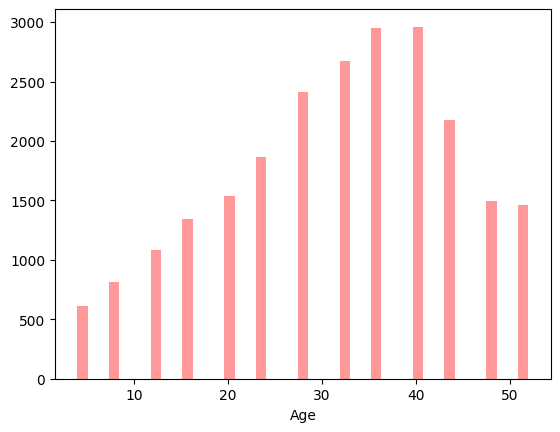

In [ ]:
sns.distplot(df["Age"],hist=True, kde=False, color='red')


<Axes: xlabel='Sex', ylabel='count'>

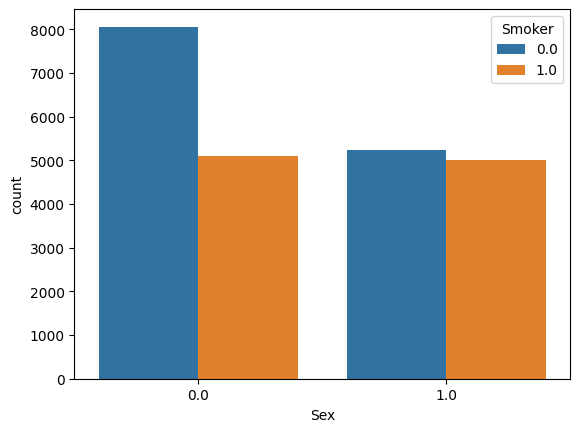

In [ ]:
sns.countplot(x='Sex', data=df, hue='Smoker')

<Axes: xlabel='Smoker', ylabel='count'>

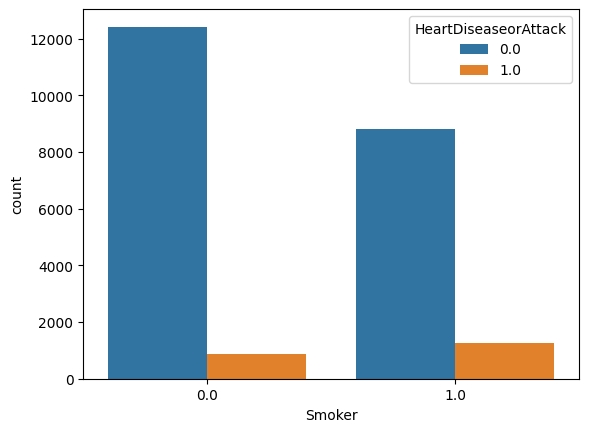

In [ ]:
sns.countplot(x='Smoker', data=df, hue='HeartDiseaseorAttack')

<Axes: xlabel='Smoker', ylabel='count'>

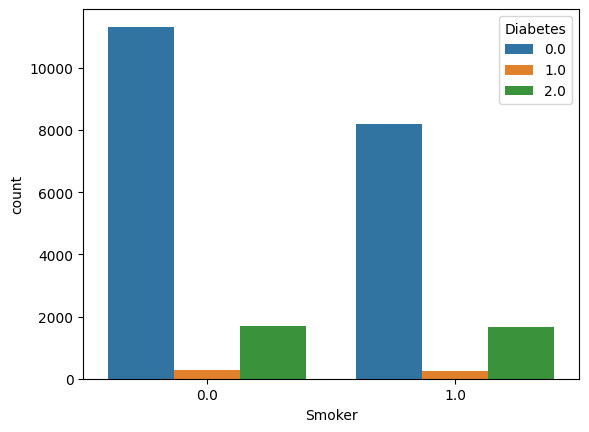

In [ ]:
sns.countplot(x='Smoker', data=df, hue='Diabetes')

<Axes: xlabel='Smoker', ylabel='count'>

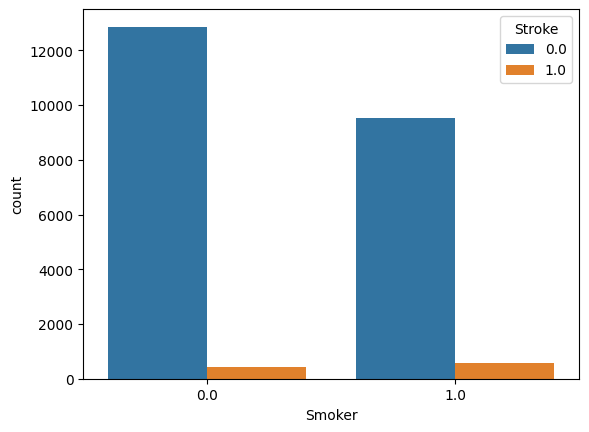

In [ ]:
sns.countplot(x='Smoker', data=df, hue='Stroke')

<Axes: xlabel='Diabetes', ylabel='count'>

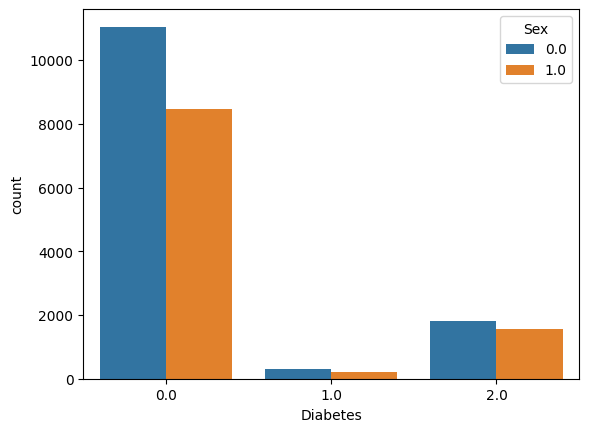

In [ ]:
sns.countplot(x='Diabetes', data=df, hue='Sex')

<Axes: xlabel='PhysActivity', ylabel='count'>

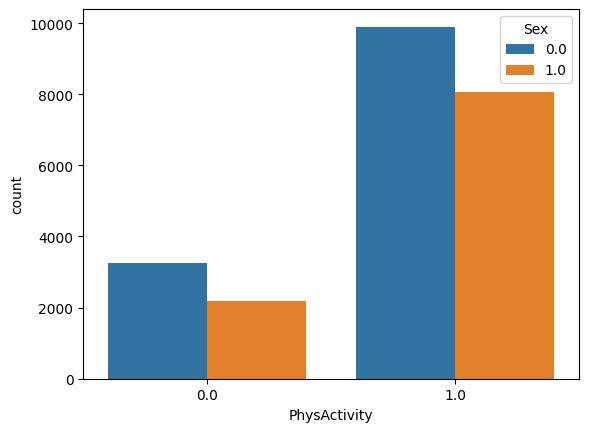

In [ ]:
sns.countplot(x='PhysActivity', data=df, hue='Sex')

<Axes: xlabel='PhysActivity', ylabel='count'>

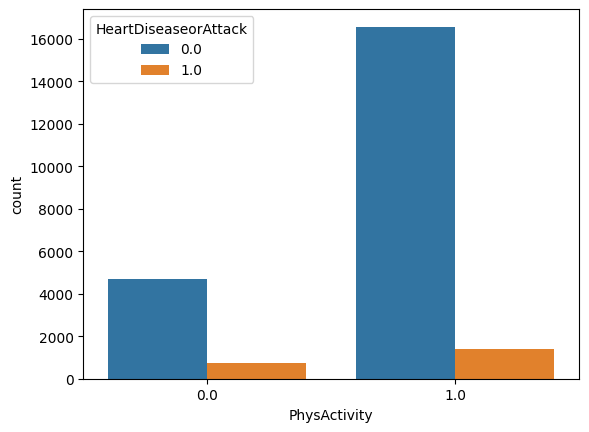

In [ ]:
sns.countplot(x='PhysActivity', data=df, hue='HeartDiseaseorAttack')

<Axes: xlabel='PhysActivity', ylabel='count'>

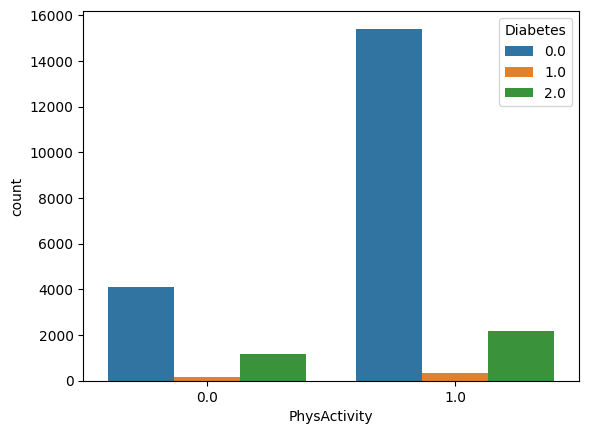

In [ ]:
sns.countplot(x='PhysActivity', data=df, hue='Diabetes')

<ipython-input-20-3c5a1fa6d77f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Education"], kde=False, color='Blue')


<Axes: xlabel='Education'>

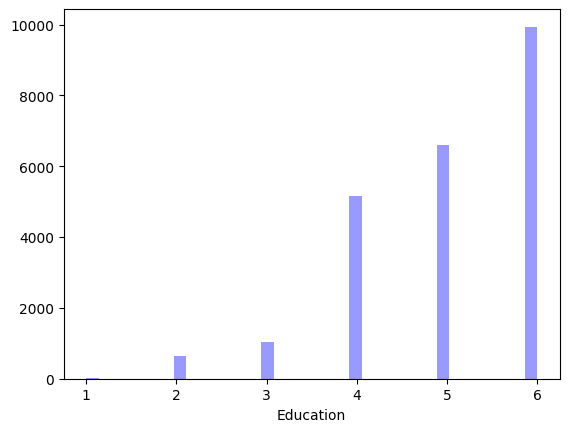

In [ ]:
sns.distplot(df["Education"], kde=False, color='Blue')

<ipython-input-21-2215d9ecd85a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], kde=False, color='Blue')


<Axes: xlabel='Income'>

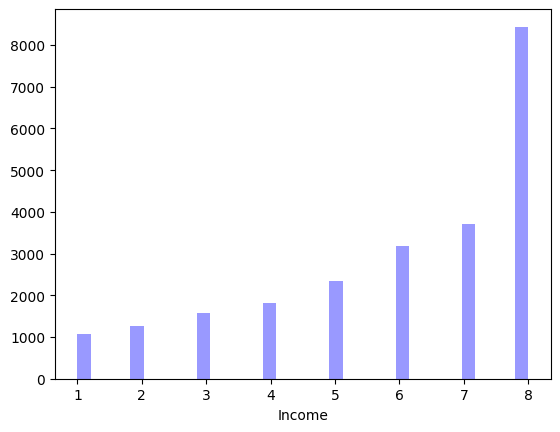

In [ ]:
sns.distplot(df['Income'], kde=False, color='Blue')

<ipython-input-22-2215d9ecd85a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], kde=False, color='Blue')


<Axes: xlabel='Income'>

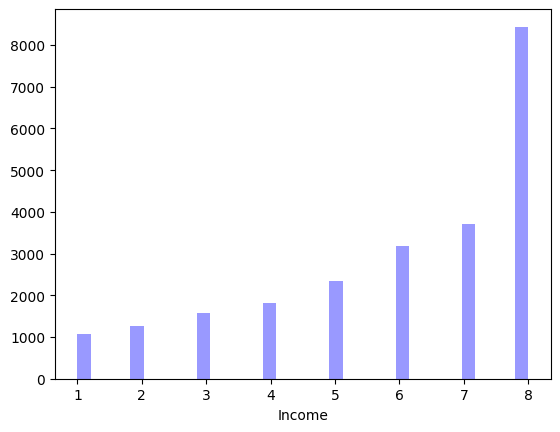

In [ ]:
sns.distplot(df['Income'], kde=False, color='Blue')

<Axes: xlabel='Fruits', ylabel='count'>

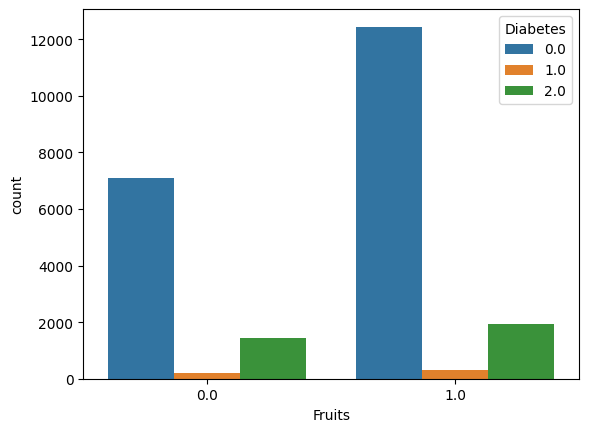

In [ ]:
sns.countplot(x='Fruits', data=df, hue='Diabetes')

<Axes: xlabel='Fruits', ylabel='count'>

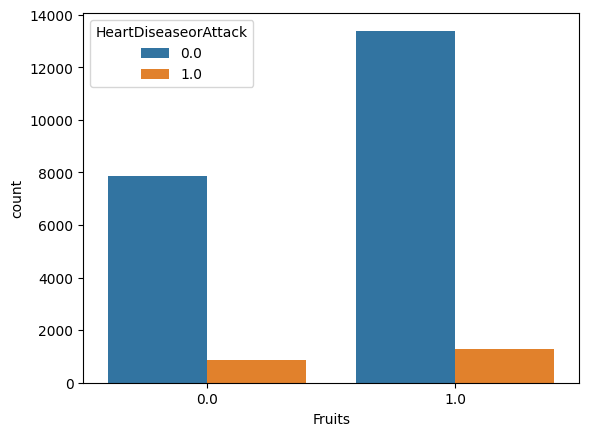

In [ ]:
sns.countplot(x='Fruits', data=df, hue='HeartDiseaseorAttack')

<Axes: xlabel='Veggies', ylabel='count'>

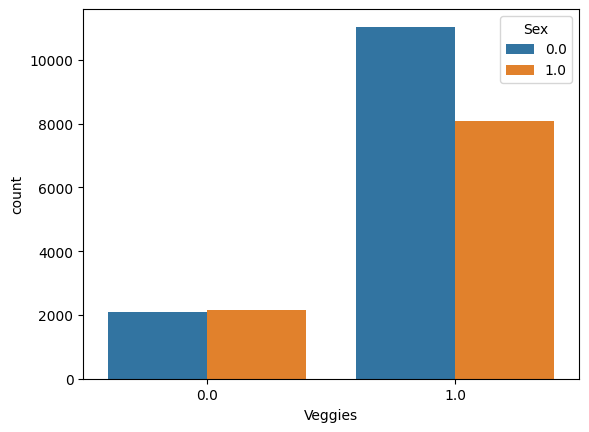

In [ ]:
sns.countplot(x='Veggies', data=df, hue='Sex')

<Axes: xlabel='Veggies', ylabel='count'>

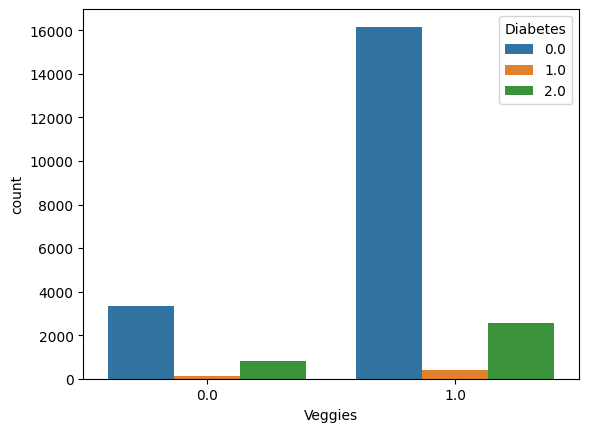

In [ ]:
sns.countplot(x='Veggies', data=df, hue='Diabetes')

<Axes: xlabel='Veggies', ylabel='count'>

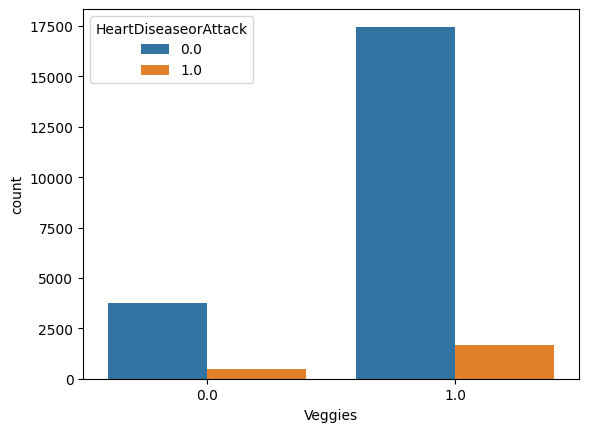

In [ ]:
sns.countplot(x='Veggies', data=df, hue='HeartDiseaseorAttack')

<ipython-input-28-325641447f24>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'], kde=False)


<Axes: xlabel='BMI'>

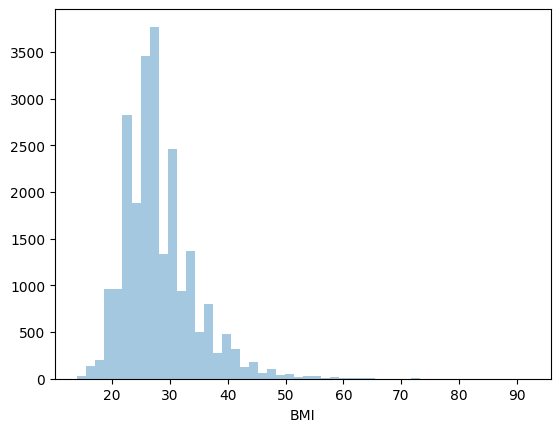

In [ ]:
sns.distplot(df['BMI'], kde=False)

<Axes: xlabel='BMI', ylabel='count'>

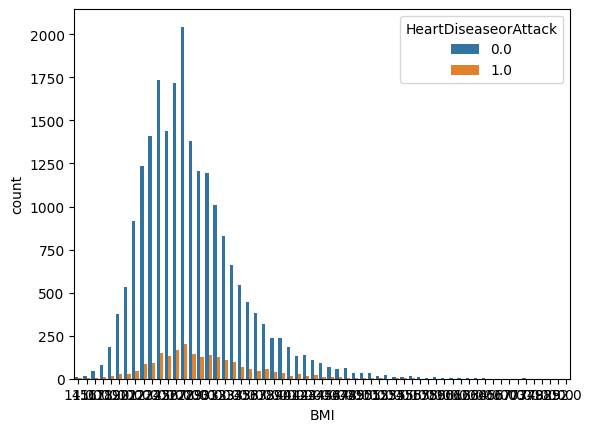

In [ ]:
sns.countplot(x='BMI', data=df, hue='HeartDiseaseorAttack')

<Axes: xlabel='BMI', ylabel='count'>

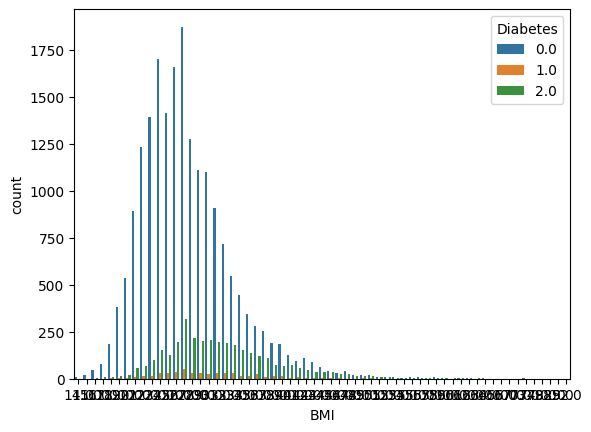

In [ ]:
sns.countplot(x='BMI', data=df, hue='Diabetes')

<Axes: xlabel='AnyHealthcare', ylabel='count'>

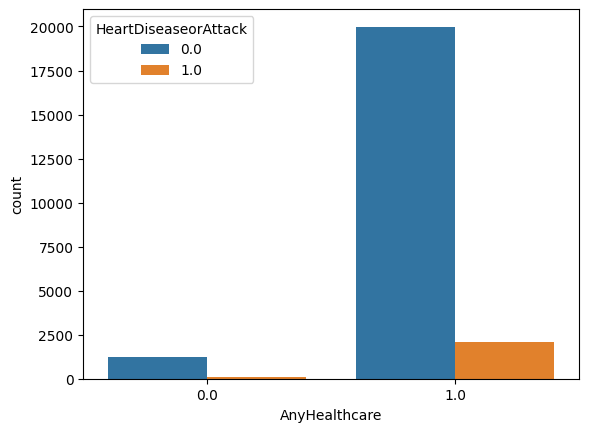

In [ ]:
sns.countplot(x='AnyHealthcare', data=df, hue='HeartDiseaseorAttack')

<Axes: xlabel='AnyHealthcare', ylabel='count'>

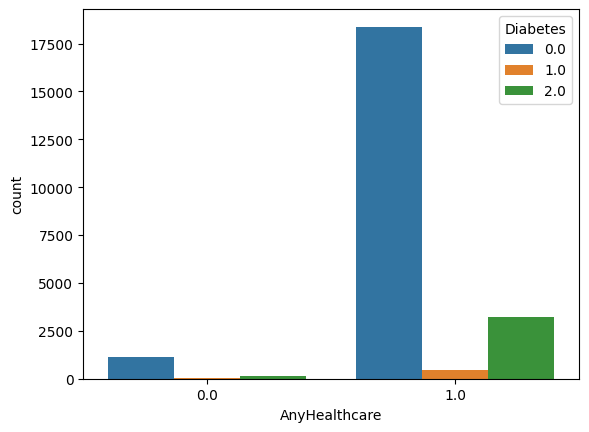

In [ ]:
sns.countplot(x='AnyHealthcare', data=df, hue='Diabetes')

<Axes: xlabel='AnyHealthcare', ylabel='count'>

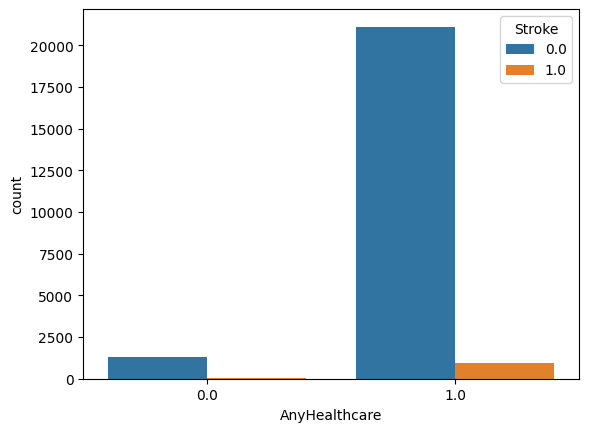

In [ ]:
sns.countplot(x='AnyHealthcare', data=df, hue='Stroke')

In [ ]:
x=df.drop(['HeartDiseaseorAttack', 'Education', 'Income'], axis=1)
y=df['HeartDiseaseorAttack']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
y_train.value_counts()

0.0    14869
1.0     1504
Name: HeartDiseaseorAttack, dtype: int64

In [ ]:
sampler=SMOTE()
x_train,y_train=sampler.fit_resample(x_train,y_train)
y_train.value_counts()

ValueError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.8606378 , -0.85645186,  0.19838746, ..., -0.46357369,
         1.13245224,  0.03142244],
       [-0.8606378 , -0.85645186, -5.04064128, ..., -0.46357369,
         1.13245224, -0.61203994],
       [-0.8606378 , -0.85645186,  0.19838746, ..., -0.46357369,
         1.13245224, -0.29030875],
       ...,
       [-0.8606378 ,  1.16760795,  0.19838746, ..., -0.46357369,
        -0.88303945,  0.67488481],
       [-0.8606378 , -0.85645186,  0.19838746, ..., -0.46357369,
        -0.88303945, -0.29030875],
       [-0.8606378 , -0.85645186,  0.19838746, ..., -0.46357369,
         1.13245224,  0.03142244]])

In [ ]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'NB':GaussianNB(),
    'XGC':XGBClassifier(),
    'RF':RandomForestClassifier()
    
}

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


for name,model in  models.items():
    print(f'using {name}: ')
    history = model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'Training Accuracy :{accuracy_score(y_train,model.predict(x_train))}')
    print(f'Testing Accuracy :{accuracy_score(y_test,y_pred)}')
    print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred)}')
    print(f'Recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print(f'Fbeta-score: {fbeta_score(y_test,y_pred,beta=0.5)}')
    print(classification_report(y_test,y_pred))
    print('-'*33)

using LR: 
Training Accuracy :0.9102180418982471
Testing Accuracy :0.9117982331148475
Confusion matrix:
 [[6308   67]
 [ 552   91]]
Recall: 0.14152410575427682
precision: 0.5759493670886076
F1-score: 0.22721598002496876
Fbeta-score: 0.3568627450980392
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      6375
         1.0       0.58      0.14      0.23       643

    accuracy                           0.91      7018
   macro avg       0.75      0.57      0.59      7018
weighted avg       0.89      0.91      0.89      7018

---------------------------------
using KNN: 
Training Accuracy :0.9202956086239541
Testing Accuracy :0.9053861499002565
Confusion matrix:
 [[6252  123]
 [ 541  102]]
Recall: 0.15863141524105753
precision: 0.4533333333333333
F1-score: 0.23502304147465436
Fbeta-score: 0.3305249513933895
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      6375
         1.0       0.45  

In [ ]:
model=RandomForestClassifier()
history = model.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9068110572812768
Precision: 0.4662576687116564
Recall: 0.1181959564541213


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
accuracy_scores = []
a=1
b=1
for name,model in  models.items():
    b=b+1
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

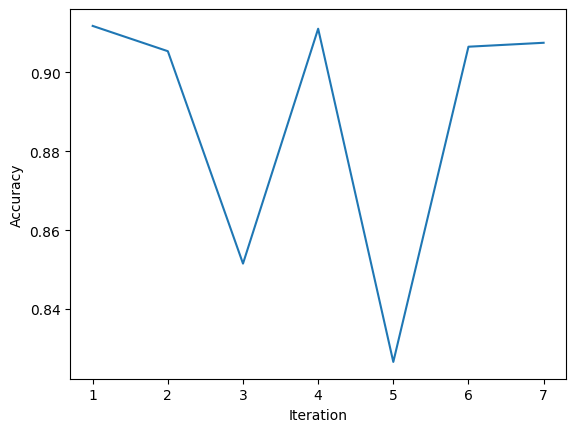

In [ ]:
# Plot the accuracy scores
plt.plot(range(a,b), accuracy_scores)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()